## Source

- Energy consumption data obtained from Appendix I: Detailed Energy Balance from page 52 of the 2023 MEMD Statistical Abstract

In [1]:
import numpy as np
import pandas as pd
import os
from utils.utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
edau = EDAUtils()
gu = GeneralUtils()

In [4]:
# Set up paths
CURRENT_DIR_PATH = os.getcwd()
OUTPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "output_data")
INPUT_DATA_DIR_PATH = os.path.join(CURRENT_DIR_PATH, "input_data")

In [6]:
# Load gdp data
consumpinit_inen = pd.read_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "GDP.csv"))
# Filter to 2015 and onwards
consumpinit_inen = consumpinit_inen[consumpinit_inen['year'] >= 2015].reset_index(drop=True)


consumpinit_inen.head()

,year,gdp_mmm_usd
0,2015,79.03
1,2016,82.81
2,2017,85.41
3,2018,90.79
4,2019,96.64


In [7]:
# Raw inputs: ktoe = kilotonnes of oil equivalent
iron_and_steel_ktoe = 193.0 # 2023 value in ktoe
chemical_and_petrochemical_ktoe = 32.0 # 2023 value in ktoe
nonmetallic_minerals_ktoe = 545.0 # 2023 value in ktoe
machinery_ktoe = 394.0 # 2023 value in ktoe
food_beverages_and_tobacco_ktoe = 753.0 # 2023 value in ktoe

# Set base year
base_year = 2023

In [8]:
# Convert ktoe to TJ
ktoe_to_tj = 41.868

# Mapping
sector_mapping = {
    "consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing": (machinery_ktoe * ktoe_to_tj + food_beverages_and_tobacco_ktoe * ktoe_to_tj) / consumpinit_inen[consumpinit_inen.year == base_year]['gdp_mmm_usd'].values[0]
}

sector_mapping


{'consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing': np.float64(421.17940995876114)}

In [9]:
# Set GDP scaling factor
gdp_scaling = consumpinit_inen.loc[consumpinit_inen['year'] == base_year, 'gdp_mmm_usd'].values[0]
gdp_scaling

np.float64(114.01933443209398)

In [10]:
# Filter the consumpinit_inen to only include <= base_year
consumpinit_inen = consumpinit_inen[consumpinit_inen['year'] <= base_year].reset_index(drop=True)
consumpinit_inen

,year,gdp_mmm_usd
0,2015,79.030000
1,2016,82.810000
2,2017,85.410000
3,2018,90.790000
4,2019,96.640000
5,2020,99.490000
6,2021,103.010000
7,2022,107.730000
8,2023,114.019334


In [11]:
# Scale by gdp
for col, value in sector_mapping.items():
    consumpinit_inen[col] = (value * (consumpinit_inen['gdp_mmm_usd'] / gdp_scaling))

In [12]:
consumpinit_inen

,year,gdp_mmm_usd,consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing
0,2015,79.030000,291.931267
1,2016,82.810000,305.894321
2,2017,85.410000,315.498539
3,2018,90.790000,335.371881
4,2019,96.640000,356.981370
5,2020,99.490000,367.509069
6,2021,103.010000,380.511702
7,2022,107.730000,397.947050
8,2023,114.019334,421.179410


In [13]:
# Drop unnecessary columns
consumpinit_inen = consumpinit_inen.drop(columns=['gdp_mmm_usd'])
consumpinit_inen

,year,consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing
0,2015,291.931267
1,2016,305.894321
2,2017,315.498539
3,2018,335.371881
4,2019,356.981370
5,2020,367.509069
6,2021,380.511702
7,2022,397.947050
8,2023,421.179410


In [14]:
# project to 2100
consumpinit_inen = gu.extend_projection(consumpinit_inen, base_year + 1, 2100)
consumpinit_inen

,year,consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing
0,2015,291.931267
1,2016,305.894321
2,2017,315.498539
3,2018,335.371881
4,2019,356.981370
...,...,...
81,2096,421.179410
82,2097,421.179410
83,2098,421.179410
84,2099,421.179410


## Validation

In [15]:
# check for duplicates
gu.check_duplicates(consumpinit_inen)

No duplicated years found in the DataFrame.
No duplicated rows found in the DataFrame.


In [16]:
# read global data and filter it to only include consumpinit_inen_energy columns
uga_global_df = pd.read_csv(os.path.join(INPUT_DATA_DIR_PATH, "sisepuede_raw_global_inputs_uganda.csv"))
uga_global_df.head()

,frac_agrc_nuts_cl1_temperate,yf_agrc_cereals_tonne_ha,frac_agrc_rice_cl2_wet,frac_agrc_cereals_cl1_tropical,frac_agrc_tubers_cl1_tropical,pop_lvst_initial_chickens,frac_agrc_bevs_and_spices_cl2_wet,frac_agrc_tubers_cl2_wet,frac_frst_primary_cl1_temperate_nutrient_rich,frac_lndu_grasslands_cl2_dry,...,nemomod_entc_frac_min_share_production_pp_biogas,nemomod_entc_frac_min_share_production_pp_coal,nemomod_entc_frac_min_share_production_pp_coal_ccs,nemomod_entc_frac_min_share_production_pp_gas,nemomod_entc_frac_min_share_production_pp_gas_ccs,nemomod_entc_frac_min_share_production_pp_geothermal,nemomod_entc_frac_min_share_production_pp_nuclear,nemomod_entc_frac_min_share_production_pp_ocean,nemomod_entc_frac_min_share_production_pp_waste_incineration,nemomod_entc_frac_min_share_production_pp_wind
0,0.030468,1.805033,0.988021,0.969532,0.969532,46039000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030468,1.832342,0.988021,0.969532,0.969532,46291000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.030468,1.827437,0.988021,0.969532,0.969532,47578000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030468,1.935353,0.988021,0.969532,0.969532,48901000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.030468,2.003586,0.988021,0.969532,0.969532,43121000,0.988021,0.988021,0.015234,0.011979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Comparing consumpinit_inen_energy_tj_per_mmm_gdp_other_product_manufacturing...


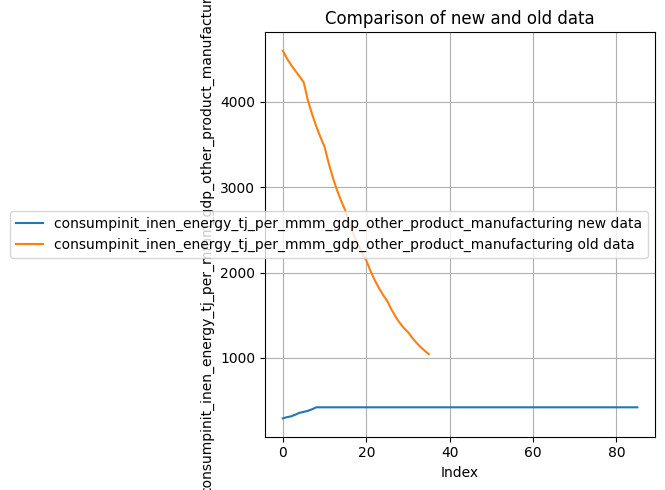

In [17]:
for var in consumpinit_inen.columns:
    if var != 'year':
        print(f"Comparing {var}...")
        edau.compare_variables(consumpinit_inen, uga_global_df, [var])

## Save

In [18]:
consumpinit_inen.to_csv(os.path.join(OUTPUT_DATA_DIR_PATH, "consumpinit_inen_other_product_manufacturing.csv"), index=False)